# Task-4 Stock Market Prediction

## Importing Relevant Libraries 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading datasets 

In [3]:
Stock=pd.read_csv('BSESN1.csv')

In [68]:
Stock.shape

(249, 7)

<AxesSubplot:ylabel='Close'>

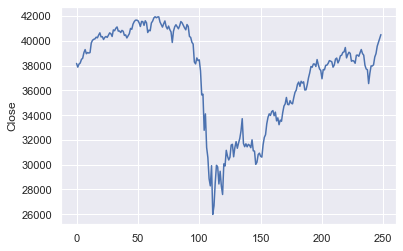

In [97]:
sns.lineplot(x=Stock.index, y=Stock.Close)

## Note: Here we can see a huge dropdown due to corona pandemic lockdown

In [4]:
news=pd.read_csv('india-news-headlines.csv')

## Importing some more libraries  

In [5]:
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
news=news.head(6000)

#### Note: Here i have taken top 6000 headlines as jupyter notebooks cannot handle such large amount of data

In [7]:
news

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
5995,20010625,unknown,China to have largest mobile phone market soon
5996,20010625,unknown,Jeev shoots 3-under 69; finishes fourth
5997,20010625,india,Hurriyat to wait for response from Vajpayee; M...
5998,20010625,business.india-business,Desperately seeking disinvestment


## Data Cleaning

In [8]:
news

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
5995,20010625,unknown,China to have largest mobile phone market soon
5996,20010625,unknown,Jeev shoots 3-under 69; finishes fourth
5997,20010625,india,Hurriyat to wait for response from Vajpayee; M...
5998,20010625,business.india-business,Desperately seeking disinvestment


In [9]:
news.drop('publish_date', axis=1, inplace=True)

In [10]:
news.isna().sum()

headline_category    0
headline_text        0
dtype: int64

In [11]:
news=news.dropna()

In [12]:
news.duplicated().sum()

827

In [13]:
news=news.drop_duplicates()

In [15]:
news

,headline_category,headline_text
0,sports.wwe,win over cena satisfying but defeating underta...
1,unknown,Status quo will not be disturbed at Ayodhya; s...
2,unknown,Fissures in Hurriyat over Pak visit
3,unknown,America's unwanted heading for India?
4,unknown,For bigwigs; it is destination Goa
...,...,...
5995,unknown,China to have largest mobile phone market soon
5996,unknown,Jeev shoots 3-under 69; finishes fourth
5997,india,Hurriyat to wait for response from Vajpayee; M...
5998,business.india-business,Desperately seeking disinvestment


Text(0.5, 0, 'COUNTS')

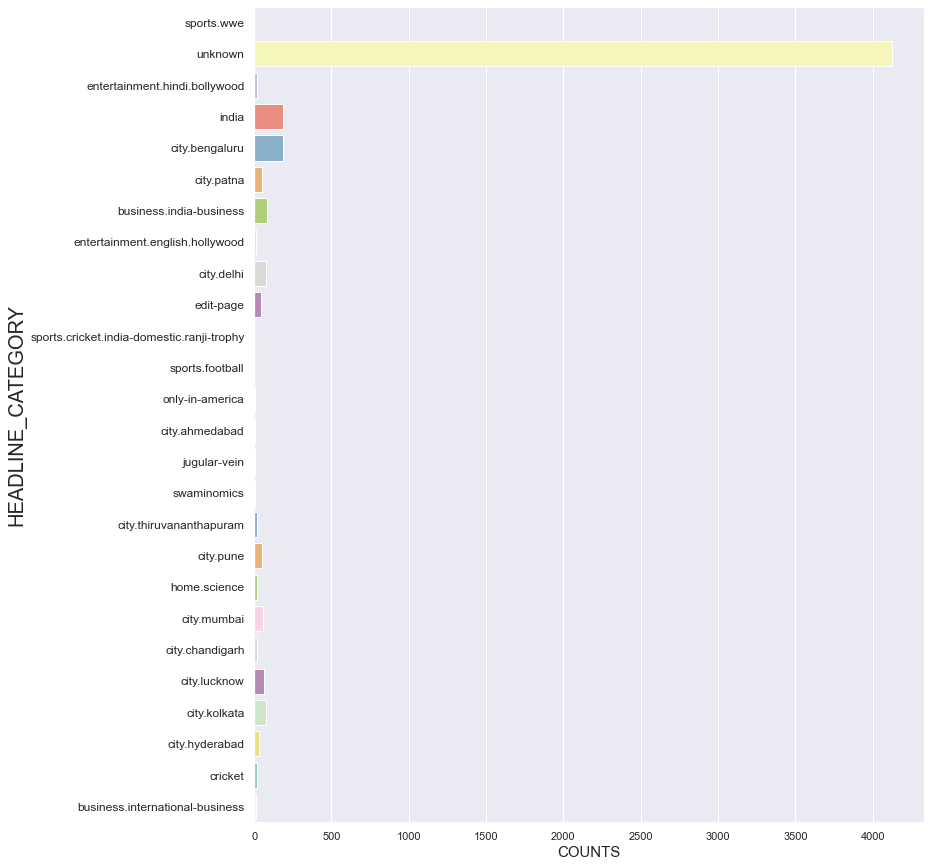

In [16]:
plt.figure(figsize=(12,15))
ax=sns.countplot(y=news['headline_category'],palette="Set3")
plt.yticks(fontsize=12);
plt.ylabel('HEADLINE_CATEGORY', fontsize=20)
plt.xlabel('COUNTS',fontsize=15)


### Here from above graph we can conclude that 80% of things are unknown category so removing that category

Text(0.5, 0, 'COUNTS')

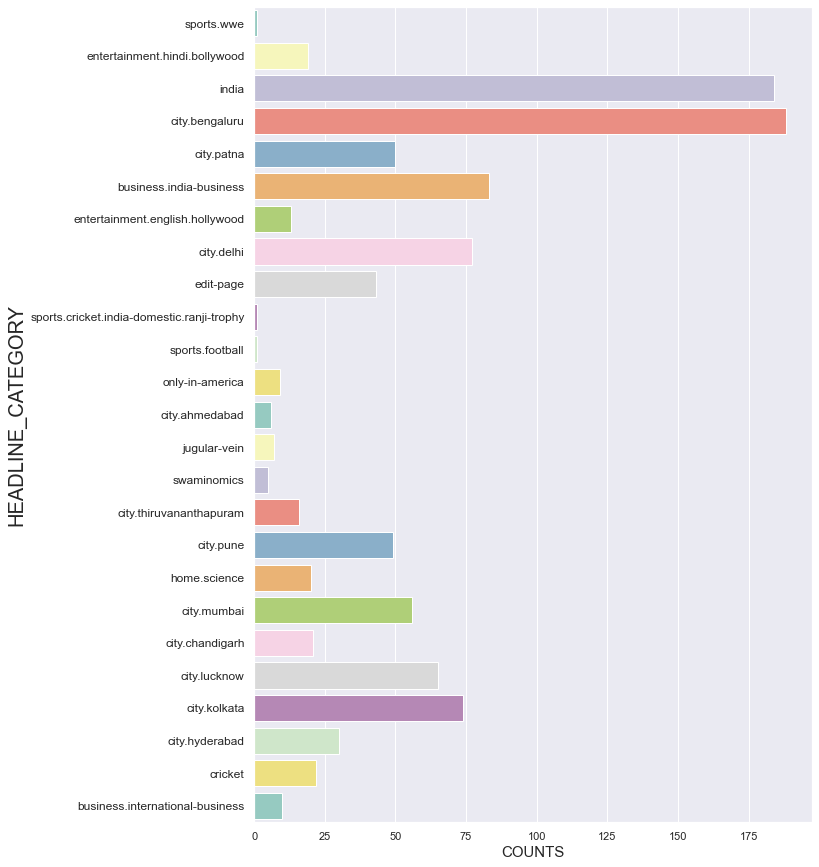

In [17]:
plt.figure(figsize=(10,15))
news1=news[news['headline_category']!='unknown']
ax=sns.countplot(y=news1['headline_category'],palette="Set3")
plt.yticks(fontsize=12);
plt.ylabel('HEADLINE_CATEGORY', fontsize=20)
plt.xlabel('COUNTS',fontsize=15)

### Counting characters

In [18]:
news['char_count'] = news['headline_text'].str.len()
news[['headline_text', 'char_count']].head()

,headline_text,char_count
0,win over cena satisfying but defeating underta...,69
1,Status quo will not be disturbed at Ayodhya; s...,58
2,Fissures in Hurriyat over Pak visit,35
3,America's unwanted heading for India?,37
4,For bigwigs; it is destination Goa,34


### Counting words 

In [19]:
news['word_count'] = news['headline_text'].apply(lambda x: len(str(x).split(" ")))
news[['headline_text','word_count']].head()

,headline_text,word_count
0,win over cena satisfying but defeating underta...,10
1,Status quo will not be disturbed at Ayodhya; s...,10
2,Fissures in Hurriyat over Pak visit,6
3,America's unwanted heading for India?,5
4,For bigwigs; it is destination Goa,6


### Seeing average word length

In [20]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

news['avg_word'] = news['headline_text'].apply(lambda x: avg_word(x))
news[['headline_text','avg_word']]

,headline_text,avg_word
0,win over cena satisfying but defeating underta...,6.000000
1,Status quo will not be disturbed at Ayodhya; s...,4.900000
2,Fissures in Hurriyat over Pak visit,5.000000
3,America's unwanted heading for India?,6.600000
4,For bigwigs; it is destination Goa,4.833333
...,...,...
5995,China to have largest mobile phone market soon,4.875000
5996,Jeev shoots 3-under 69; finishes fourth,5.666667
5997,Hurriyat to wait for response from Vajpayee; M...,5.875000
5998,Desperately seeking disinvestment,10.333333


In [22]:
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [23]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Calculating Sopwords 

In [26]:
from nltk.corpus import stopwords

In [28]:
stop = stopwords.words('english')

news['stopwords'] = news['headline_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
news[['headline_text','stopwords']].head()

,headline_text,stopwords
0,win over cena satisfying but defeating underta...,2
1,Status quo will not be disturbed at Ayodhya; s...,4
2,Fissures in Hurriyat over Pak visit,2
3,America's unwanted heading for India?,1
4,For bigwigs; it is destination Goa,2


### Number of Special characters in each statements 

In [29]:
news['hastags'] = news['headline_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
news[['headline_text','hastags']].head()


,headline_text,hastags
0,win over cena satisfying but defeating underta...,0
1,Status quo will not be disturbed at Ayodhya; s...,0
2,Fissures in Hurriyat over Pak visit,0
3,America's unwanted heading for India?,0
4,For bigwigs; it is destination Goa,0


### Number of numerics in each statements

In [30]:
news['numerics'] = news['headline_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
news[['headline_text','numerics']].head()

,headline_text,numerics
0,win over cena satisfying but defeating underta...,0
1,Status quo will not be disturbed at Ayodhya; s...,0
2,Fissures in Hurriyat over Pak visit,0
3,America's unwanted heading for India?,0
4,For bigwigs; it is destination Goa,0


In [31]:
news['upper'] = news['headline_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
news[['headline_text','upper']].head()

,headline_text,upper
0,win over cena satisfying but defeating underta...,0
1,Status quo will not be disturbed at Ayodhya; s...,0
2,Fissures in Hurriyat over Pak visit,0
3,America's unwanted heading for India?,0
4,For bigwigs; it is destination Goa,0


### Uppercase words

In [32]:
news['headline_text'] = news['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
news['headline_text'].head()

0    win over cena satisfying but defeating underta...
1    status quo will not be disturbed at ayodhya; s...
2                  fissures in hurriyat over pak visit
3                america's unwanted heading for india?
4                   for bigwigs; it is destination goa
Name: headline_text, dtype: object

### Removing punctuations 

In [33]:
news['headline_text'] = news['headline_text'].str.replace('[^\w\s]','')
news['headline_text'].head()

0    win over cena satisfying but defeating underta...
1    status quo will not be disturbed at ayodhya sa...
2                  fissures in hurriyat over pak visit
3                  americas unwanted heading for india
4                    for bigwigs it is destination goa
Name: headline_text, dtype: object

### Removing Stopwords

In [34]:
stop = stopwords.words('english')
news['headline_text'] = news['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))
news['headline_text'].head()

0    win cena satisfying defeating undertaker bigge...
1           status quo disturbed ayodhya says vajpayee
2                          fissures hurriyat pak visit
3                      americas unwanted heading india
4                              bigwigs destination goa
Name: headline_text, dtype: object

### Removing common words

In [35]:
freq = pd.Series(' '.join(news['headline_text']).split()).value_counts()[:10]
freq

govt      171
india     137
new       101
may        69
us         66
cong       66
police     65
cm         64
get        62
bjp        60
dtype: int64

### Removing rare words 

In [36]:
freq = pd.Series(' '.join(news['headline_text']).split()).value_counts()[-10:]
freq

emperor         1
fragile         1
snuffed         1
musically       1
thehelka        1
worship         1
sensible        1
renuka          1
loadshedding    1
sensory         1
dtype: int64

In [37]:
news['headline_text'].apply(lambda x: str(TextBlob(x).correct()))

0       win cent satisfying defeating undertaken bigge...
1              status que disturbed ayodhya says vajpayee
2                             fissures hurriyat pay visit
3                         american unwanted heading india
4                                  bigwigs destination go
                              ...                        
5995               china largest mobile phone market soon
5996                 been shoots under 69 finished fourth
5997            hurriyat wait response vajpayee musharraf
5998                    desperately seeking disinvestment
5999                         brigadier move court packing
Name: headline_text, Length: 5173, dtype: object

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Tokenization 

In [50]:
TextBlob(str(news['headline_text'])).words

WordList(['0', 'win', 'cena', 'satisfying', 'defeating', 'undertaker', 'bigge', '1', 'status', 'quo', 'disturbed', 'ayodhya', 'says', 'vajpayee', '2', 'fissures', 'hurriyat', 'pak', 'visit', '3', 'americas', 'unwanted', 'heading', 'india', '4', 'bigwigs', 'destination', 'goa', '5995', 'china', 'largest', 'mobile', 'phone', 'market', 'soon', '5996', 'jeev', 'shoots', '3under', '69', 'finishes', 'fourth', '5997', 'hurriyat', 'wait', 'response', 'vajpayee', 'musharraf', '5998', 'desperately', 'seeking', 'disinvestment', '5999', 'brigadier', 'move', 'court', 'sacking', 'Name', 'headline_text', 'Length', '5173', 'dtype', 'object'])

### Stemming

In [40]:
from nltk.stem import PorterStemmer

In [51]:
st = PorterStemmer()
news['headline_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       win cena satisfi defeat undertak bigger roman ...
1                   statu quo disturb ayodhya say vajpaye
2                               fissur hurriyat pak visit
3                               america unwant head india
4                                       bigwig destin goa
                              ...                        
5995                china largest mobil phone market soon
5996                   jeev shoot 3under 69 finish fourth
5997              hurriyat wait respons vajpaye musharraf
5998                                desper seek disinvest
5999                              brigadi move court sack
Name: headline_text, Length: 5173, dtype: object

### Trigram

In [52]:
T3=TextBlob(str(news['headline_text'][1:])).ngrams(3)
T3[:30]

[WordList(['1', 'status', 'quo']),
 WordList(['status', 'quo', 'disturbed']),
 WordList(['quo', 'disturbed', 'ayodhya']),
 WordList(['disturbed', 'ayodhya', 'says']),
 WordList(['ayodhya', 'says', 'vajpayee']),
 WordList(['says', 'vajpayee', '2']),
 WordList(['vajpayee', '2', 'fissures']),
 WordList(['2', 'fissures', 'hurriyat']),
 WordList(['fissures', 'hurriyat', 'pak']),
 WordList(['hurriyat', 'pak', 'visit']),
 WordList(['pak', 'visit', '3']),
 WordList(['visit', '3', 'americas']),
 WordList(['3', 'americas', 'unwanted']),
 WordList(['americas', 'unwanted', 'heading']),
 WordList(['unwanted', 'heading', 'india']),
 WordList(['heading', 'india', '4']),
 WordList(['india', '4', 'bigwigs']),
 WordList(['4', 'bigwigs', 'destination']),
 WordList(['bigwigs', 'destination', 'goa']),
 WordList(['destination', 'goa', '5']),
 WordList(['goa', '5', 'extra']),
 WordList(['5', 'extra', 'buses']),
 WordList(['extra', 'buses', 'clear']),
 WordList(['buses', 'clear', 'tourist']),
 WordList(['clea

### Term frequency

In [53]:
tf = (news['headline_text'][1:]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf.columns = ['words','tf']
tf

,words,tf
0,vajpayee,17.0
1,status,7.0
2,quo,1.0
3,says,59.0
4,disturbed,1.0
...,...,...
8833,finishes,1.0
8834,shoots,1.0
8835,69,1.0
8836,desperately,1.0


In [54]:
for i,word in enumerate(tf['words']):
    tf.loc[i, 'idf'] = np.log(news1.shape[0]/(len(news[news['headline_text'].str.contains(word)])))
tf

,words,tf,idf
0,vajpayee,17.0,3.778492
1,status,7.0,5.010635
2,quo,1.0,4.653960
3,says,59.0,2.879008
4,disturbed,1.0,6.956545
...,...,...,...
8833,finishes,1.0,6.956545
8834,shoots,1.0,6.263398
8835,69,1.0,6.263398
8836,desperately,1.0,6.956545


In [55]:
tf['tfidf'] = tf['tf'] * tf['idf']
tf

,words,tf,idf,tfidf
0,vajpayee,17.0,3.778492,64.234357
1,status,7.0,5.010635,35.074447
2,quo,1.0,4.653960,4.653960
3,says,59.0,2.879008,169.861472
4,disturbed,1.0,6.956545,6.956545
...,...,...,...,...
8833,finishes,1.0,6.956545,6.956545
8834,shoots,1.0,6.263398,6.263398
8835,69,1.0,6.263398,6.263398
8836,desperately,1.0,6.956545,6.956545


### Performing Sentimental analysis

In [56]:
news['headline_text'][1:].apply(lambda x: TextBlob(x).sentiment)

1                                       (0.0, 0.0)
2                                       (0.0, 0.0)
3                                       (0.0, 0.0)
4                                       (0.0, 0.0)
5       (0.05000000000000001, 0.24166666666666664)
                           ...                    
5995                                    (0.0, 0.0)
5996                                    (0.0, 0.0)
5997                                    (0.0, 0.0)
5998                                   (-0.6, 1.0)
5999                                    (0.0, 0.0)
Name: headline_text, Length: 5172, dtype: object

### Assigning polarity

In [57]:
news['sentiment'] = news['headline_text'].apply(lambda x: TextBlob(x).sentiment[0] )
news[['headline_text','sentiment']].head()

,headline_text,sentiment
0,win cena satisfying defeating undertaker bigge...,0.433333
1,status quo disturbed ayodhya says vajpayee,0.000000
2,fissures hurriyat pak visit,0.000000
3,americas unwanted heading india,0.000000
4,bigwigs destination goa,0.000000


In [58]:
news

,headline_category,headline_text,char_count,word_count,avg_word,stopwords,hastags,numerics,upper,sentiment
0,sports.wwe,win cena satisfying defeating undertaker bigge...,69,10,6.000000,2,0,0,0,0.433333
1,unknown,status quo disturbed ayodhya says vajpayee,58,10,4.900000,4,0,0,0,0.000000
2,unknown,fissures hurriyat pak visit,35,6,5.000000,2,0,0,0,0.000000
3,unknown,americas unwanted heading india,37,5,6.600000,1,0,0,0,0.000000
4,unknown,bigwigs destination goa,34,6,4.833333,2,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
5995,unknown,china largest mobile phone market soon,46,8,4.875000,2,0,0,0,0.000000
5996,unknown,jeev shoots 3under 69 finishes fourth,39,6,5.666667,0,0,0,0,0.000000
5997,india,hurriyat wait response vajpayee musharraf,54,8,5.875000,3,0,0,0,0.000000
5998,business.india-business,desperately seeking disinvestment,33,3,10.333333,0,0,0,0,-0.600000


In [61]:
x1=news[news['sentiment']>=0.5]
x2=news[news['sentiment']<0.5]

In [62]:
news['sentiment']=news['sentiment'].astype(float)
news.sentiment[news.sentiment>0]=1
news.sentiment[news.sentiment<0]=-1;

In [ ]:
news

In [63]:
merge_data=pd.merge(news,Stock, left_index=True, right_index=True)

In [64]:
merge_data

,headline_category,headline_text,char_count,word_count,avg_word,stopwords,hastags,numerics,upper,sentiment,Date,Open,High,Low,Close,Adj Close,Volume
0,sports.wwe,win cena satisfying defeating undertaker bigge...,69,10,6.000000,2,0,0,0,1.0,09-10-2019,37628.05078,38209.83984,37415.82813,38177.94922,38177.94922,36400
1,unknown,status quo disturbed ayodhya says vajpayee,58,10,4.900000,4,0,0,0,0.0,10-10-2019,38130.23047,38130.23047,37802.92969,37880.39844,37880.39844,27300
2,unknown,fissures hurriyat pak visit,35,6,5.000000,2,0,0,0,0.0,11-10-2019,37994.48047,38345.41016,37737.85156,38127.07813,38127.07813,39400
3,unknown,americas unwanted heading india,37,5,6.600000,1,0,0,0,0.0,14-10-2019,38208.23828,38513.69141,38066.12891,38214.46875,38214.46875,28500
4,unknown,bigwigs destination goa,34,6,4.833333,2,0,0,0,0.0,15-10-2019,38316.48828,38635.19141,38238.26953,38506.08984,38506.08984,26200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,unknown,goa told start quickgrowth coconut project,46,7,5.714286,1,0,0,0,0.0,05-10-2020,38956.78125,39263.85156,38819.89063,38973.69922,38973.69922,15500
245,unknown,experts discuss horticulture development,40,4,9.250000,0,0,0,0,0.0,06-10-2020,39336.33984,39623.76172,39191.10156,39574.57031,39574.57031,11300
246,unknown,5 acquitted trespassing case,31,5,5.400000,1,0,1,0,0.0,07-10-2020,39633.19141,39968.03906,39450.82031,39878.94922,39878.94922,15000
247,unknown,development horticulture stressed,36,4,8.250000,1,0,0,0,0.0,08-10-2020,40204.32031,40468.87891,40062.23047,40182.67188,40182.67188,14400


[Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')]

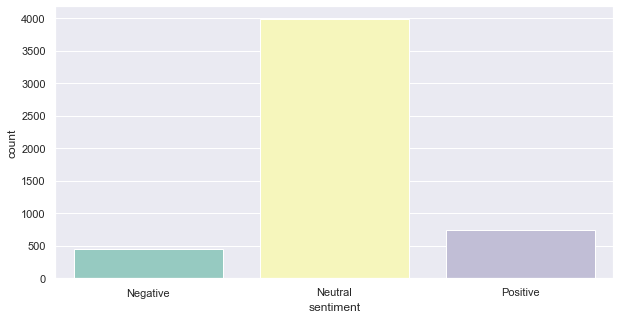

In [96]:
plt.figure(figsize=(10,5))
ax=sns.countplot(news['sentiment'],palette='Set3')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

## Here we can see that there are much more neutral sentiments followed by positive and negative sentiments based on the their polarity acquired from above techniques

In [65]:
X=merge_data.iloc[:,[2,3,4,5,6,7,9,11,12,13,14,15,16]].values

In [66]:
y=merge_data['sentiment']

In [67]:
y.value_counts()

 0.0    140
 1.0     24
-1.0      8
Name: sentiment, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=45)

In [71]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly',degree=3,class_weight='balanced')
svclassifier.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='poly')

In [72]:
y_pred = svclassifier.predict(X_test)


In [73]:
y_pred

array([-1.,  0.,  1.,  1., -1.,  0.,  1., -1., -1.,  0.,  1., -1.,  0.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  0., -1.,  1.,  1.,
        1.,  0.,  1., -1.,  0.,  0.,  1.,  0.,  1.])

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 0  0  1]
 [ 8  7 12]
 [ 2  2  3]]


In [75]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         1
         0.0       0.78      0.26      0.39        27
         1.0       0.19      0.43      0.26         7

    accuracy                           0.29        35
   macro avg       0.32      0.23      0.22        35
weighted avg       0.64      0.29      0.35        35



In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [77]:
model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [78]:
predictions = model.predict(X_test)
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1.])

In [88]:
from sklearn.metrics import classification_report

In [94]:
print( classification_report(y_test, predictions) )

C:\Users\Hp\anaconda3\envs\Scikit learn\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         1
         0.0       0.76      0.96      0.85        27
         1.0       0.00      0.00      0.00         7

    accuracy                           0.74        35
   macro avg       0.25      0.32      0.28        35
weighted avg       0.59      0.74      0.66        35



## Conclusion: I have used two models which we can clearly see that Linear Discriminant analysis has around 74% accuracy followed by SVC model which was 29%

# Here I have shown that how different news haedlines can affect stock market price and here i have used price of S&P BSE.